In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [110]:
data = pd.read_csv("Customer_churn.csv")
print("shape:",data.shape)
data.head()

shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
data.drop('customerID',axis='columns',inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


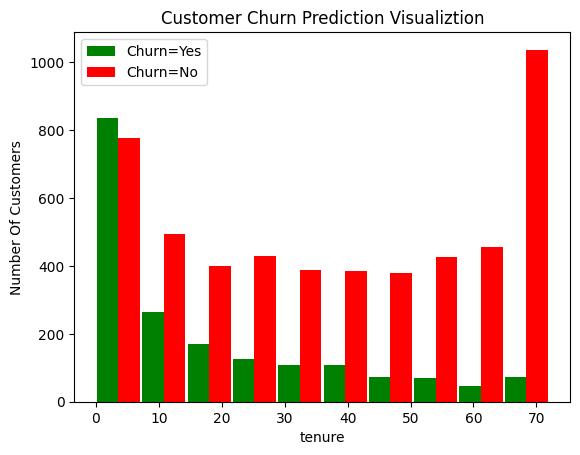

In [66]:
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [67]:
# New thing to learn in data cleaning
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')


print_unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [68]:
data = data.replace({"Yes":1 , "No":0 , 'No internet service':0 , 'No phone service':0})

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [70]:
columns_to_encode = ['Contract', 'PaymentMethod' , 'gender','InternetService']
data["InternetService"] = data["InternetService"].replace({0:"0"})

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in columns_to_encode:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])


data = data.drop(['Contract', 'PaymentMethod' , 'gender','InternetService'] , axis = 1)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   PhoneService             7043 non-null   int64  
 5   MultipleLines            7043 non-null   int64  
 6   OnlineSecurity           7043 non-null   int64  
 7   OnlineBackup             7043 non-null   int64  
 8   DeviceProtection         7043 non-null   int64  
 9   TechSupport              7043 non-null   int64  
 10  StreamingTV              7043 non-null   int64  
 11  StreamingMovies          7043 non-null   int64  
 12  PaperlessBilling         7043 non-null   int64  
 13  MonthlyCharges           7043 non-null   float64
 14  TotalCharges            

In [72]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]     # These are the rows with empty cells
# Lets drop these rows as they are only 11 of them
data = data[data.TotalCharges!=' ']

# Again appying the to_numeric we get TotalCharges as float
data.TotalCharges = pd.to_numeric(data.TotalCharges)

<ipython-input-72-6b14ce0d1731>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalCharges = pd.to_numeric(data.TotalCharges)


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7032 non-null   int64  
 1   Partner                  7032 non-null   int64  
 2   Dependents               7032 non-null   int64  
 3   tenure                   7032 non-null   int64  
 4   PhoneService             7032 non-null   int64  
 5   MultipleLines            7032 non-null   int64  
 6   OnlineSecurity           7032 non-null   int64  
 7   OnlineBackup             7032 non-null   int64  
 8   DeviceProtection         7032 non-null   int64  
 9   TechSupport              7032 non-null   int64  
 10  StreamingTV              7032 non-null   int64  
 11  StreamingMovies          7032 non-null   int64  
 12  PaperlessBilling         7032 non-null   int64  
 13  MonthlyCharges           7032 non-null   float64
 14  TotalCharges            

In [74]:
data_ann = data

In [75]:
# print_unique_col_values(data)

df = data
for column in df:
    print(f'{column}: {df[column].unique()}')

SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
Contract_encoded: [0 1 2]
PaymentMethod_encoded: [2 3 0 1]
gender_encoded: [0 1]
InternetService_encoded: [1 2 0]


In [76]:
# We can also enter a list of columns to MinMaxScaler()
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_encoded,PaymentMethod_encoded,gender_encoded,InternetService_encoded
0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,2,0,1
1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,3,1,1
2,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,3,1,1
3,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,1,1
4,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,3,1,1
7039,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,1,1,0,2
7040,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,0,2,0,1
7041,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,3,1,2


In [77]:
def x_y_split(data):
    x = data.drop(['Churn'] , axis = 1)
    y = data['Churn']

    return x,y

x , y =   x_y_split(data)

In [78]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_encoded,PaymentMethod_encoded,gender_encoded,InternetService_encoded
0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,2,0,1
1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,1,3,1,1
2,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,0,3,1,1
3,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,1,0,1,1
4,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,1,3,1,1
7039,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,1,1,0,2
7040,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,2,0,1
7041,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,0,3,1,2


In [79]:
def get_Score(x,y):
    x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                         test_size = 0.1,
                                                         random_state = 42)

    from sklearn.linear_model import LogisticRegression
    LogisticRegression = LogisticRegression()
    LogisticRegression.fit(x_train,y_train)
    y_pred = LogisticRegression.predict(x_test)

    from sklearn.metrics import accuracy_score, precision_score, f1_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy , precision , f1

get_Score(x,y)

(0.7883522727272727, 0.6466666666666666, 0.565597667638484)

In [80]:
# X_columns = x.columns
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# x = ss.fit_transform(x)
# x = pd.DataFrame(x,columns = X_columns)
# x

In [81]:
# from sklearn.decomposition import PCA

# pca = PCA(1)  # this parameter indicate amount of data needed to be retainted
# x = pca.fit_transform(x)
# x.shape

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


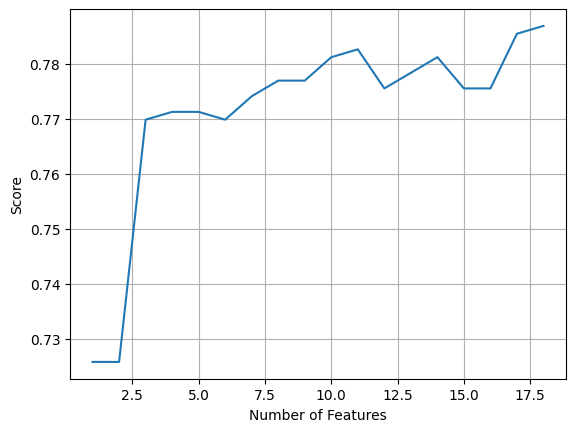

['Contract_encoded', 'tenure', 'InternetService_encoded', 'MonthlyCharges', 'TotalCharges', 'DeviceProtection', 'PaymentMethod_encoded', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'MultipleLines', 'Partner', 'Dependents', 'SeniorCitizen', 'PhoneService', 'StreamingTV']


In [82]:
# def plot_feature_score(feature_scores_df):

from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(x, y)

# Create a DataFrame to store feature scores
feature_scores_df = pd.DataFrame({"Feature": x.columns, "Score": mi_scores})

result = {}

for i in range(18):


    top_k = i+1  # Number of top features you want to retrieve

    # Get the indices of the top k features
    top_feature_indices = feature_scores_df.nlargest(top_k, "Score").index

    # Retrieve the feature names of the top k features
    top_feature_names = feature_scores_df.loc[top_feature_indices, "Feature"].tolist()

    x = data[top_feature_names]
    y = y
    score = get_Score(x,y)
    score = score[0]

    result[top_k] = score

feature = list(result.keys())
score = list(result.values())

plt.plot(feature, score)
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()
print(top_feature_names)

In [83]:
# #  As we can see only top 12 features are contributing
# top_13_features = ['Contract_encoded', 'tenure', 'InternetService_encoded', 'PaymentMethod_encoded', 'MonthlyCharges', 'TotalCharges', 'TechSupport', 'OnlineSecurity', 'Partner', 'PaperlessBilling', 'StreamingTV', 'SeniorCitizen','DeviceProtection']
# x = x[top_13_features]

In [84]:
# With this graph we can say all the features are important

In [85]:
# So now its time for model selection

In [86]:
train_x , test_x , train_y , test_y = train_test_split(x,y,
                                                         test_size = 0.1,
                                                         random_state = 42)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = [LogisticRegression(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

def accurancy_precision_recall(model,train_x , test_x , train_y , test_y):
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(pred, test_y), precision_score(pred, test_y,average='macro'), recall_score(pred, test_y,average='macro')

for model in models:
    results = accurancy_precision_recall(model,train_x , test_x , train_y , test_y)
    print(f"{model}", results)

LogisticRegression() (0.7869318181818182, 0.6968455634081299, 0.734760263619324)
SVC() (0.7826704545454546, 0.679400342719244, 0.7316444095312908)
DecisionTreeClassifier() (0.7556818181818182, 0.6753191446214372, 0.6897073829037885)
RandomForestClassifier() (0.7982954545454546, 0.7014489520700039, 0.7557641061290696)


In [87]:
# Model selection using cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x, y,cv=5)
svc_score = cross_val_score(SVC(gamma='auto'), x, y,cv=5)
dtc_score = cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
rfc_score = cross_val_score(RandomForestClassifier(n_estimators=200),x, y,cv=5)


lr_score , svc_score , dtc_score, rfc_score

(array([0.80383795, 0.8159204 , 0.78876245, 0.80369844, 0.80512091]),
 array([0.80597015, 0.80881308, 0.78520626, 0.80156472, 0.80440967]),
 array([0.73987207, 0.73987207, 0.72475107, 0.7083926 , 0.73684211]),
 array([0.78749112, 0.79317697, 0.77382646, 0.79231863, 0.79871977]))

In [88]:
# This shows simple Logistic Regession model is working very good
# But still try something !

In [89]:
# Best hyperparameters: {'C': 1, 'penalty': 'l2'}
# Best accuracy on test set: 0.8069552874378992

In [90]:
# Class count
count_class_0, count_class_1 = data.Churn.value_counts()

# Divide by class
df_class_0 = data[data['Churn'] == 0]
df_class_1 = data[data['Churn'] == 1]

count_class_0, count_class_1

(5163, 1869)

In [91]:
# Here we can see there is a imbalace in data

In [92]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [93]:
x_under , y_under = x_y_split(df_test_under)

In [94]:
get_Score(x_under,y_under)

(0.7486631016042781, 0.6851851851851852, 0.7589743589743589)

In [95]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [96]:
x_over , y_over = x_y_split(df_test_over)
get_Score(x_over , y_over)

(0.7734753146176185, 0.7570093457943925, 0.7758620689655172)

In [97]:
pip install imbalanced-learn

In [98]:
# x , y

In [99]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x , y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [100]:
get_Score(x_sm, y_sm)

(0.8083252662149081, 0.7765765765765765, 0.8132075471698113)

In [43]:
# Even after addressing the imbalace issue it is hard to get good accuracy
# So now lets go with Artificial Neural Network

In [101]:
x_ann = data_ann.drop('Churn',axis=1)
y_ann = data_ann['Churn']

In [102]:
!pip install tensorflow-addons

from tensorflow_addons import losses

In [103]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [104]:
x_ann.shape

(7032, 19)

In [105]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=19, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=10)
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x_ann, y_ann, test_size=0.2, random_state=15, stratify=y)

In [107]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
176/176 [==============================] - 5s 6ms/step - loss: 0.4870 - accuracy: 0.7490
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4310 - accuracy: 0.7858
Epoch 3/10
176/176 [==============================] - 3s 16ms/step - loss: 0.4241 - accuracy: 0.7892
Epoch 4/10
176/176 [==============================] - 2s 12ms/step - loss: 0.4205 - accuracy: 0.7941
Epoch 5/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4171 - accuracy: 0.7968
Epoch 6/10
176/176 [==============================] - 2s 9ms/step - loss: 0.4157 - accuracy: 0.7973
Epoch 7/10
176/176 [==============================] - 1s 7ms/step - loss: 0.4142 - accuracy: 0.8012
Epoch 8/10
176/176 [==============================] - 1s 8ms/step - loss: 0.4130 - accuracy: 0.8034
Epoch 9/10
176/176 [==============================] - 2s 9ms/step - loss: 0.4123 - accuracy: 0.8009
Epoch 10/10
44/44 [==============================] - 2s 6ms/step - loss: 0.4333 - accuracy: 0.8010

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=15, stratify=y_under)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 4s 5ms/step - loss: 0.5952 - accuracy: 0.6880
Epoch 2/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5184 - accuracy: 0.7488
Epoch 3/10
94/94 [==============================] - 1s 6ms/step - loss: 0.5062 - accuracy: 0.7559
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.7609
Epoch 5/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.7652
Epoch 6/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4930 - accuracy: 0.7622
Epoch 7/10
94/94 [==============================] - 1s 5ms/step - loss: 0.4898 - accuracy: 0.7669
Epoch 8/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.7709
Epoch 9/10
94/94 [==============================] - 0s 5ms/step - loss: 0.4876 - accuracy: 0.7635
Epoch 10/10
24/24 [==============================] - 1s 8ms/step - loss: 0.5195 - accuracy: 0.7299
[0.5195237994194031

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=15, stratify=y_over)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
259/259 [==============================] - 4s 4ms/step - loss: 0.5514 - accuracy: 0.7185
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4990 - accuracy: 0.7556
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.7603
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4889 - accuracy: 0.7616
Epoch 5/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7650
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7661
Epoch 7/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4814 - accuracy: 0.7677
Epoch 8/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4792 - accuracy: 0.7689
Epoch 9/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4771 - accuracy: 0.7685
Epoch 10/10
65/65 [==============================] - 1s 6ms/step - loss: 0.4815 - accuracy: 0.7667
[